In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Reading the data

In [2]:
df = pd.read_csv(os.path.abspath('../data/Nal_filtre_FLX_NEE_01012011_31122017.csv'), encoding = "ISO-8859-1", sep = ';')
df.columns = df.iloc[0] # fix the col names to be the 1st col
df = df.iloc[1:] # fix the col names to be the 1st col

/tmp/ipykernel_766105/2543690903.py:1: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.abspath('../data/Nal_filtre_FLX_NEE_01012011_31122017.csv'), encoding = "ISO-8859-1", sep = ';')


In [3]:
df.head(3)

,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
1,0,01/01/2011 00:00,NaN,0.23159,NaN,NaN,NaN,NaN,0.038,0.056
2,0.5,01/01/2011 00:30,NaN,0.20874,-3.113,18.64,1.569496568,27.385,0.038,0.056
3,1,01/01/2011 01:00,NaN,0.17778,-3.181,17.785,1.453069295,27.14,0.038,0.056


---

### Convert to Numpy

In [5]:
X = df.iloc[:,2:].values
X = X.astype(float)
print(X.shape)

(122736, 8)


---

### Reshape for the seasonality

In [31]:
X_tensor = np.reshape(X, (8, -1,8))

(365, 48) (365, 12, 4)


/tmp/ipykernel_766105/3924775314.py:9: RuntimeWarning: Mean of empty slice
  Xvals = np.nanmean(Xvals, axis=0)
/tmp/ipykernel_766105/3924775314.py:13: RuntimeWarning: Mean of empty slice
  Xt = np.nanmean(Xt,axis=2)


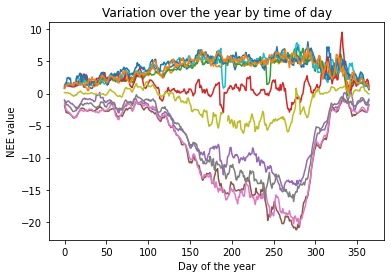

In [96]:
ns = 5 # Number of seasons, why 5 not 4
nt = 12 # Number of times of day, ???
kSize = 5 # For smoothing, ????

kernel = np.ones(kSize)/kSize
Xvals = X[:,0]
Xvals = Xvals[:365*(len(Xvals)//365)]
Xvals = np.reshape(Xvals,(-1,365,48))
Xvals = np.nanmean(Xvals, axis=0)

Xt = np.reshape(Xvals,(-1,nt,48//nt))
print(Xvals.shape, Xt.shape)
Xt = np.nanmean(Xt,axis=2)
for jt in range(nt):
    plt.plot(np.arange(365),np.convolve(Xt[:,jt],kernel,mode = 'same'),'-')
plt.title('Variation over the year by time of day')
plt.xlabel('Day of the year')
plt.ylabel('NEE value')
plt.show()

In [97]:
kSize


5

In [84]:
kernel = np.ones(kSize)/5
kernel

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [85]:
Xvals = X[:,0] # this is NEE
print(Xvals)
print(Xvals.shape)

[nan nan nan ... nan nan nan]
(122736,)


In [86]:
len(Xvals)//365*365

122640

In [87]:
Xvals = Xvals[:365*(len(Xvals)//365)] # so Prof is deleting the extra
Xvals.shape

(122640,)

In [88]:
122640/(48*365)

7.0

In [89]:
48*365

17520

In [90]:
Xvals = np.reshape(Xvals,(-1,365,48))
Xvals.shape

(7, 365, 48)

In [91]:
Xvals = np.nanmean(Xvals, axis=0)
Xvals.shape

/tmp/ipykernel_766105/910645108.py:1: RuntimeWarning: Mean of empty slice
  Xvals = np.nanmean(Xvals, axis=0)


(365, 48)

In [93]:
Xvals[0] # so there are 365 days, where each day has 48 half an hout

array([ 1.0461021 ,  0.88543948,  0.92907611,  1.45748337,  0.92393326,
        2.39609222,  2.11709572,  2.12384743,  2.19900983,  2.23703553,
        1.78276531,  1.74129943,  1.22065101,  1.28264793,  1.43628658,
       11.5280965 , -0.69698095, -2.66531679, -3.06562931, -3.28279796,
       -3.38978625, -3.60375931, -2.08843879, -3.56749699, -2.02935978,
       -1.77241217, -1.85111982, -2.87930607, -2.65997697, -2.29067948,
       -1.81319002, -0.58475301, -0.45263461, -0.33111054,  0.09772218,
        0.92210855,  1.19140292,  0.86542953,  4.07964854,  2.31150262,
        1.28411318,  2.08348637,  1.60001923,  1.56616   ,  1.96778388,
        1.35776384,  0.81727797,         nan])

In [71]:
Xt = np.reshape(Xvals,(-1,nt,48//nt))
Xt.shape

(2555, 6, 8)

In [72]:
Xt = np.nanmean(Xt,axis=2)
Xt.shape

/tmp/ipykernel_766105/1890579542.py:1: RuntimeWarning: Mean of empty slice
  Xt = np.nanmean(Xt,axis=2)


(2555, 6)